**Project Objective**


Predicting Salary of the employee based on their years of experience

**Step 1:** Importing Libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**Step 2:** Loading Data

In [ ]:
data = pd.read_csv("/content/Salary_Data.csv")

**Step 3**: Exploring Data

In [19]:
data.shape

(30, 2)

In [23]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**Checking Missing Values**

In [15]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [17]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Visualizing the data**

<Axes: title={'center': 'Years of Experince Vs Salary'}, xlabel='Years of Experience', ylabel='Salary'>

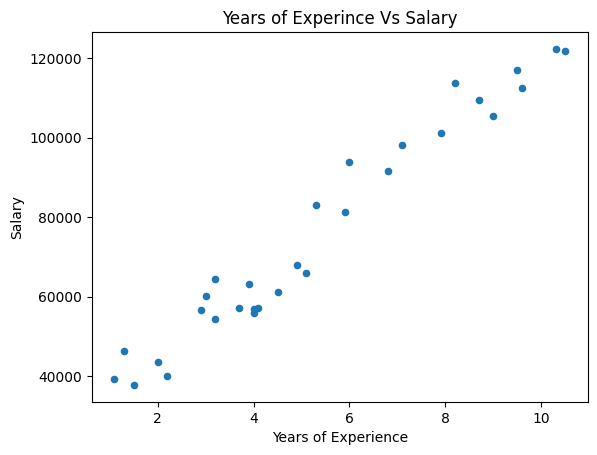

In [26]:
data.plot.scatter('YearsExperience', 'Salary', title = 'Years of Experince Vs Salary', xlabel = 'Years of Experience', ylabel = 'Salary' )

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcd4f136710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcd4f136890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcd4f135150>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcd4ec4c3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcd4ec4c670>],
 'means': []}

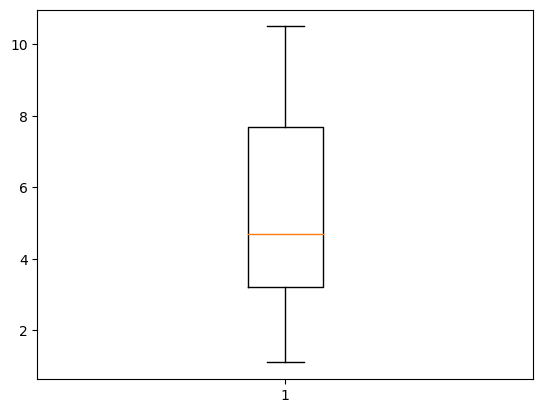

In [33]:
plt.boxplot(data['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcd4ec3f250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcd4ec3f790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcd4ec3efb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcd4ec3fcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcd4ec3ff70>],
 'means': []}

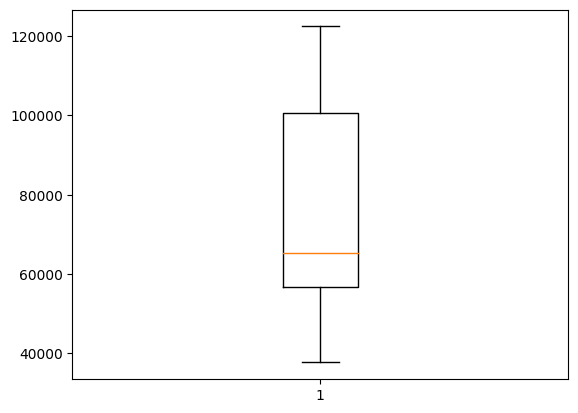

In [36]:
 plt.boxplot(data['Salary'])

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

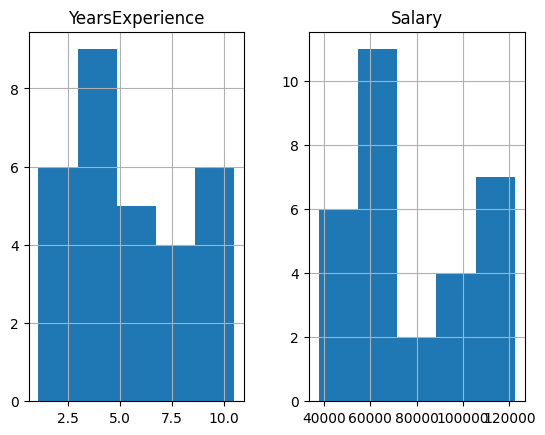

In [63]:
data.hist(bins=5)

**Assigning Dependent and Independent Variable**

In [39]:
X = data[['YearsExperience']]
y = data['Salary']

**Analyzing Data**

Spliting into Train & Test Data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

Model Selection

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [67]:
print("Intercept: ", lr.intercept_), print("Coefficient: ", lr.coef_)

Intercept:  25918.438334893202
Coefficient:  [9339.08172382]


(None, None)

**Evaluating the model**

In [71]:
from math import sqrt
meanSqErr_train = mean_squared_error(y_train_pred, y_train)
RSq_train = r2_score(y_train_pred, y_train)
rootmeansqErr_train = sqrt(meanSqErr_train)
meanAbErr_train = mean_absolute_error(y_train_pred, y_train)

In [72]:
print('R squared:', RSq_train)
print('Mean Absolute Error:', meanAbErr_train)
print('Mean Square Error:', meanSqErr_train)
print('Root Mean Square Error:', rootmeansqErr_train)

R squared: 0.955561946266519
Mean Absolute Error: 4443.338173029782
Mean Square Error: 28922215.61238366
Root Mean Square Error: 5377.937858732068


In [75]:
meanSqErr_test = mean_squared_error(y_test_pred, y_test)
RSq_test = r2_score(y_test_pred, y_test)
rootmeansqErr_test = sqrt(meanSqErr_test)
meanAbErr_test = mean_absolute_error(y_test_pred, y_test)
print('R squared:', RSq_test)
print('Mean Absolute Error:', meanAbErr_test)
print('Mean Square Error:', meanSqErr_test)
print('Root Mean Square Error:', rootmeansqErr_test)

R squared: 0.9357877420125037
Mean Absolute Error: 5161.328710400183
Mean Square Error: 37784662.46621314
Root Mean Square Error: 6146.92300799458


**Visualizing the Results**

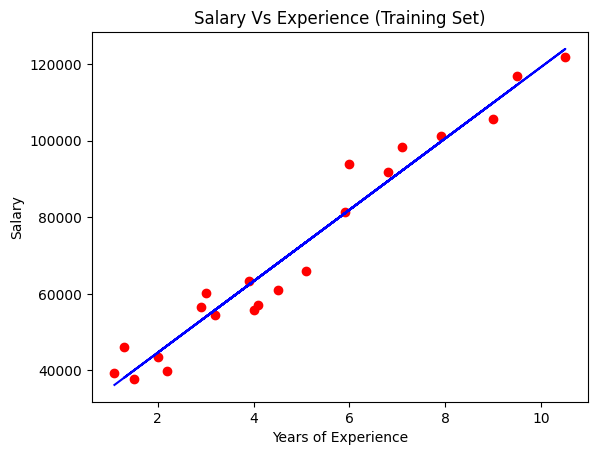

In [57]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.title('Salary Vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

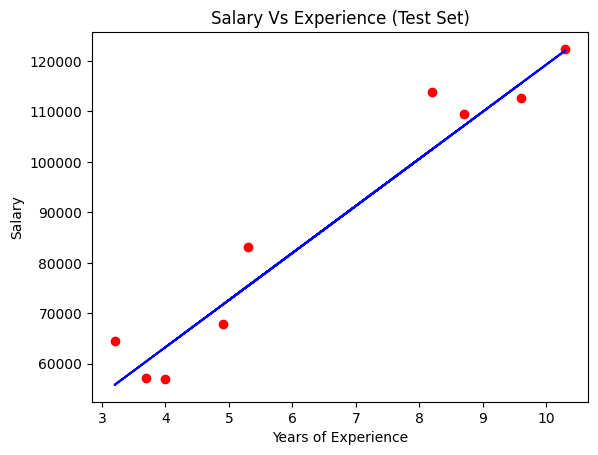

In [58]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, lr.predict(X_test), color='blue')
plt.title('Salary Vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()